In [97]:
import math

def creat_data(tlat, dlat, rlng, llng, hres, wres, chunk_size):
    dsts = [{
        "latitude": 49.278801,
        "longitude": -122.920430
    }, 
    {
        "latitude": 49.263059,
        "longitude": -123.251100
    }]
    
    data_chunks = []
    origins = []
    
    for i in range(hres):
        for j in range(wres):
            lat = dlat + i * ((tlat-dlat)/hres)
            lng = llng + j * ((rlng-llng)/wres)
            origins.append((lat, lng))
    
    for i in range(math.ceil(len(origins)/chunk_size)):
        data = {"origins": [], "destinations": dsts, "travelMode": "transit"}
        for j in range(chunk_size):
            ind = i * chunk_size + j
            if ind >= len(origins):
                break
            data["origins"].append({"latitude": origins[ind][0], "longitude": origins[ind][1]})
        data_chunks.append(data)

    return data_chunks

In [105]:
import requests
import json

KEY = 'PUT_YOUR_KEY_HERE'
url = 'https://dev.virtualearth.net/REST/v1/Routes/DistanceMatrix?key={0}'.format(KEY)
tlat, dlat, rlng, llng = 49.294353, 49.182451, -122.817806, -123.263958

data = creat_data(tlat, dlat, rlng, llng, 100, 100, 300)

result = []

for d in data:  
    r = requests.post(url, data=json.dumps(d, ensure_ascii=False))
    json_data = json.loads(r.text)
    result.append(json_data)

In [106]:
points = []
first_dis = {}
second_dis = {}

for r in result:
    ps = []
    for x in r['resourceSets'][0]['resources'][0]['origins']:
        ps.append((x['latitude'], x['longitude']))

    for x in r['resourceSets'][0]['resources'][0]['results']:
        originIndex = x['originIndex']
        dstIndex = x['destinationIndex']
        travelDuration = x['travelDuration']
        ind = len(points) + originIndex
        if dstIndex == 0:
            first_dis[ind] = travelDuration
        else:
            second_dis[ind] = travelDuration
    points.extend(ps)

In [111]:
lats = [x for x,y in points]
lngs = [y for x,y in points]
dis1 = []
dis2 = []
dis3 = []
dis4 = []
for i in range(len(points)):
    dis1.append(abs(first_dis[i]))
    dis2.append(abs(second_dis[i]))
    dis3.append(abs(first_dis[i] - second_dis[i]))
    dis4.append(abs(first_dis[i] + second_dis[i]))

In [112]:
%matplotlib inline 

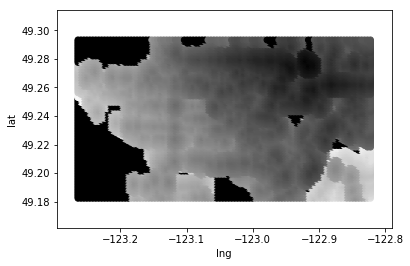

In [113]:
import numpy as np
import matplotlib.pyplot as plt


# Plot
plt.scatter(lngs, lats, c=dis1)
plt.xlabel('lng')
plt.ylabel('lat')
plt.gray()
plt.show()

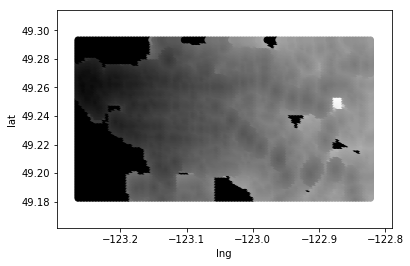

In [114]:
# Plot
plt.scatter(lngs, lats, c=dis2)
plt.xlabel('lng')
plt.ylabel('lat')
plt.gray()
plt.show()

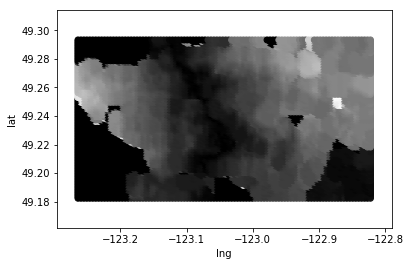

In [115]:
# Plot
plt.scatter(lngs, lats, c=dis3)
plt.xlabel('lng')
plt.ylabel('lat')
plt.gray()
plt.show()

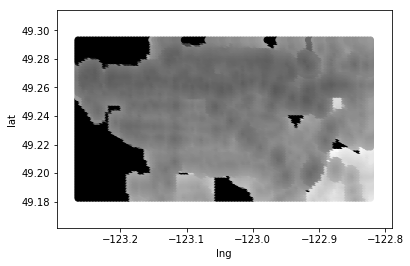

In [116]:
# Plot
plt.scatter(lngs, lats, c=dis4)
plt.xlabel('lng')
plt.ylabel('lat')
plt.gray()
plt.show()